In [ ]:
from keras import layers as L
from keras import models as M
import random as pyr
from tqdm import trange, tqdm
%pylab inline

In [ ]:
data_rate = 50*1

In [3]:
def gen_samples(n_samples, kind):
    N_IP_ADDRS = 10
    samples = []
    for _ in range(n_samples):
        tp = pyr.choice([0, 1])
        ip = [0]*N_IP_ADDRS
        ip[pyr.choice(range(N_IP_ADDRS))] = 1
        if kind == 'n':
            flag = pyr.choice([0, 1, 2, 3, 4, 5]) # flag
        else:
            flag = (pyr.choice([0, 1, 5]) if (pyr.random() < 0.8) else pyr.choice([2, 3, 4])) # flag
        fv = [flag]
        vec = [tp] + ip + fv
        samples.append(vec)
    return samples

In [4]:
def gen_dataset(n_samples, kind):
    dataset = gen_samples(n_samples, kind)

    x, y = [], []
    lag = dataset[:data_rate]
    for d in dataset[data_rate:]:
        x.append(list(lag))
        y.append(d)

        lag.pop(0)
        lag.append(d)
    return x, y

In [5]:
x, y = gen_dataset((data_rate*10), 'n')

In [6]:
inp_dim = len(x[0][0]) # out samples are 3 dimensional

m = M.Sequential([L.GRU(inp_dim,
                        input_shape=(data_rate, inp_dim)
                       )])
m.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
gru_1 (GRU)                  (None, 12)                900       
Total params: 900
Trainable params: 900
Non-trainable params: 0
_________________________________________________________________


In [7]:
m.compile('rmsprop', 'mse')

In [8]:
_x, _y = gen_dataset((data_rate*10), 'n')

In [9]:
history = m.fit(x, y, epochs=25, validation_data=(_x, _y))

Train on 450 samples, validate on 450 samples
Epoch 1/25
450/450 [==============================] - 0s - loss: 0.8204 - val_loss: 0.8673
Epoch 2/25
450/450 [==============================] - 0s - loss: 0.7484 - val_loss: 0.8108
Epoch 3/25
450/450 [==============================] - 0s - loss: 0.7035 - val_loss: 0.7680
Epoch 4/25
450/450 [==============================] - 0s - loss: 0.6695 - val_loss: 0.7340
Epoch 5/25
450/450 [==============================] - 0s - loss: 0.6419 - val_loss: 0.7087
Epoch 6/25
450/450 [==============================] - 0s - loss: 0.6207 - val_loss: 0.6875
Epoch 7/25
450/450 [==============================] - 0s - loss: 0.6030 - val_loss: 0.6694
Epoch 8/25
450/450 [==============================] - 0s - loss: 0.5882 - val_loss: 0.6548
Epoch 9/25
450/450 [==============================] - 0s - loss: 0.5764 - val_loss: 0.6433
Epoch 10/25
450/450 [==============================] - 0s - loss: 0.5665 - val_loss: 0.6336
Epoch 11/25
450/450 [======================

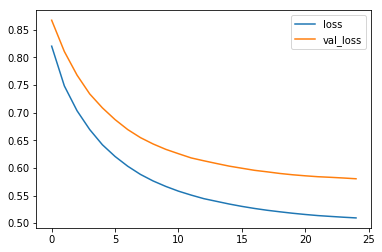

In [10]:
plot(history.history['loss'], label='loss')
plot(history.history['val_loss'], label='val_loss')
legend()

Predicting on normal data gives us an expected loss as seen in training

In [11]:
errs = []
for _ in range(100):
    _x, _y = gen_dataset((data_rate*10), 'n')
    p = m.predict(_x)
    errs.extend(list(np.square((p-_y).flatten())))

In [14]:
np.array(errs).mean()

0.53887211406767999

Predicting on attack data should give us a higher loss

In [15]:
errs = []
for _ in range(100):
    _x, _y = gen_dataset((data_rate*10), 'm')
    p = m.predict(_x)
    errs.extend(list(np.square((p-_y).flatten())))

In [16]:
np.array(errs).mean()

0.56348971503450451